###Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Data collection and preparation
Reading the dataset

In [ ]:
# train data
train = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# test data
test = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

Checking columns of training and testing data

In [ ]:
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")
# check the columns
print(train.columns == test.columns)

train shape: (70692, 22)
test shape: (253680, 22)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


Checking data types

In [ ]:
print(train.dtypes)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


Checking for null values

In [ ]:
train.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

###Exploratory data analysis
Describing the dataset

In [ ]:
train.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Visual analysis of categorical variables


In [ ]:
cat_socialecom = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
cat_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

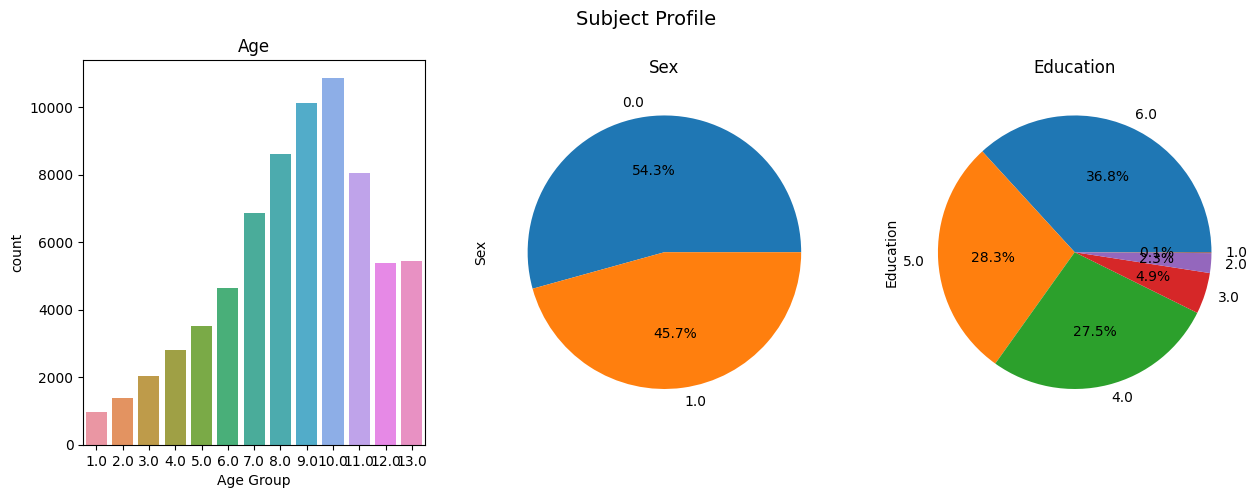

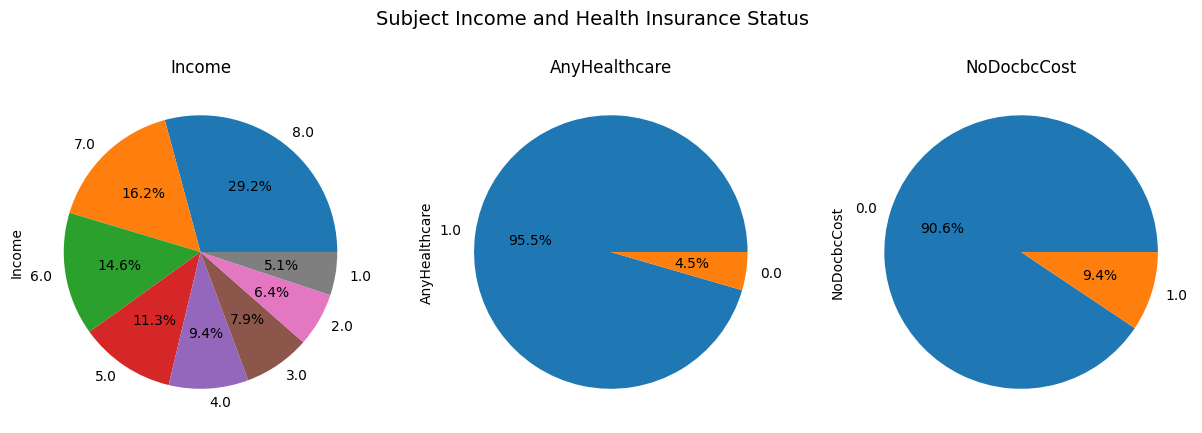

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
sns.countplot(x='Age', data=train, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')
for i, col in enumerate(['Sex', 'Education']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Subject Income and Health Insurance Status', fontsize=14)
plt.show()

Plot distribution of health self-evaluation

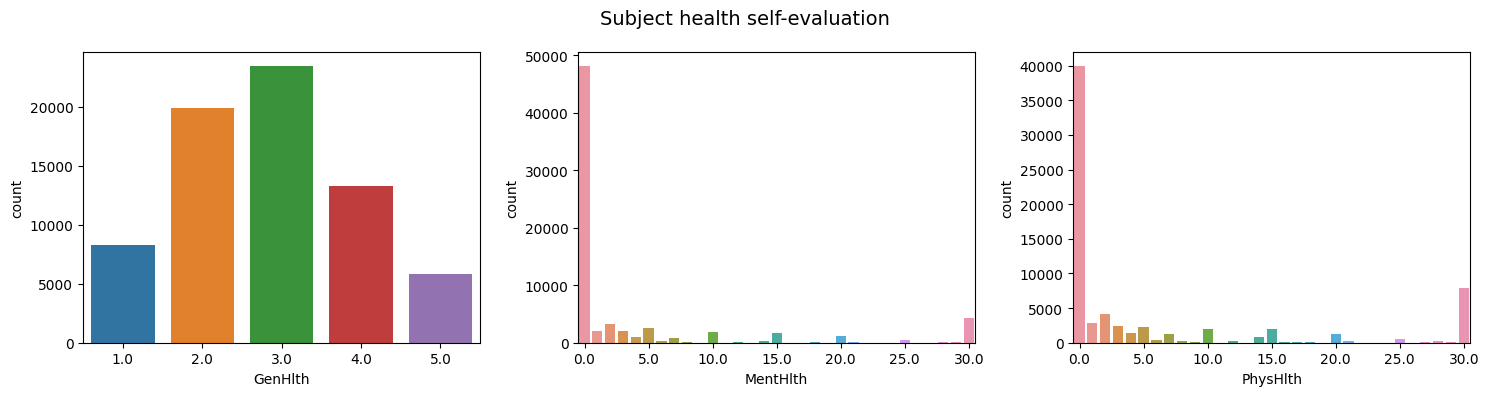

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=train, ax=axes[i])
    if len(train[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(train[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

Proportion of health issue indicators

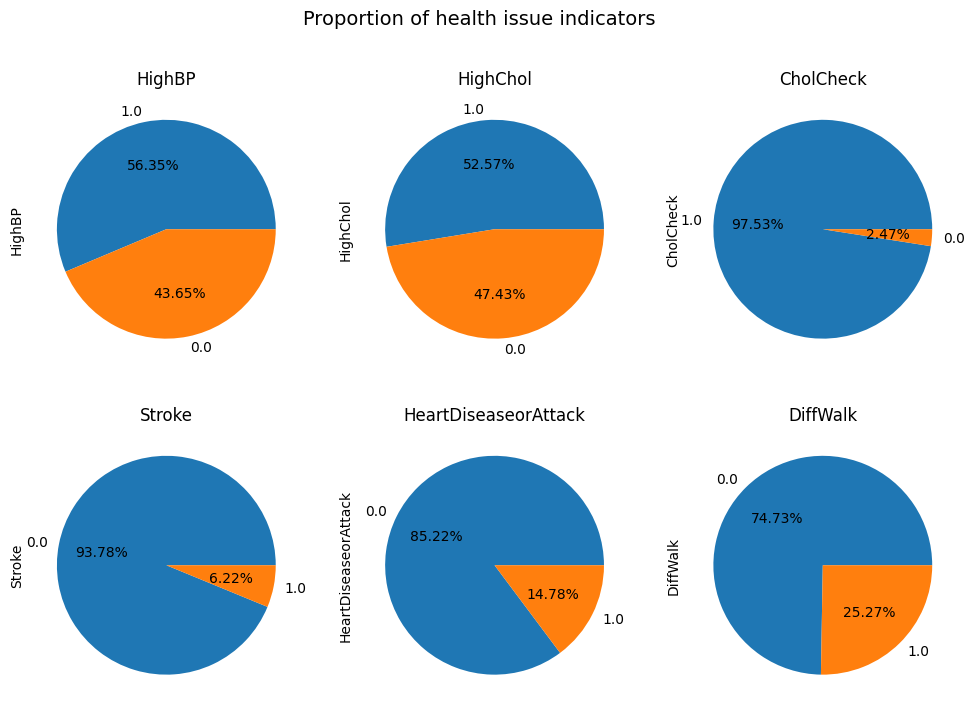

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_disease):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of health issue indicators', fontsize=14)
plt.show()

Proportion of habit indicators

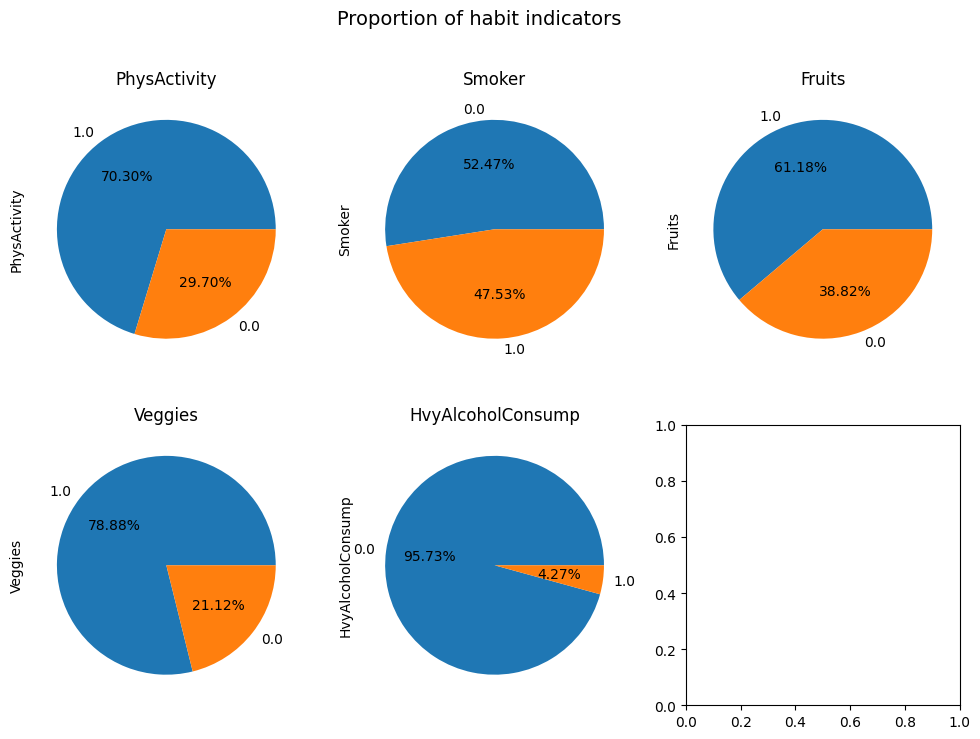

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_habit):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()

Distribution of BMI

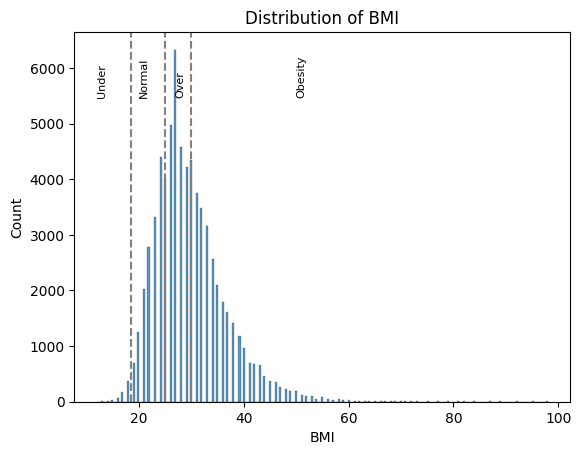

In [ ]:
plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)
sns.histplot(train['BMI'], kde=False)
plt.title('Distribution of BMI')
plt.show()

Feature and target relation

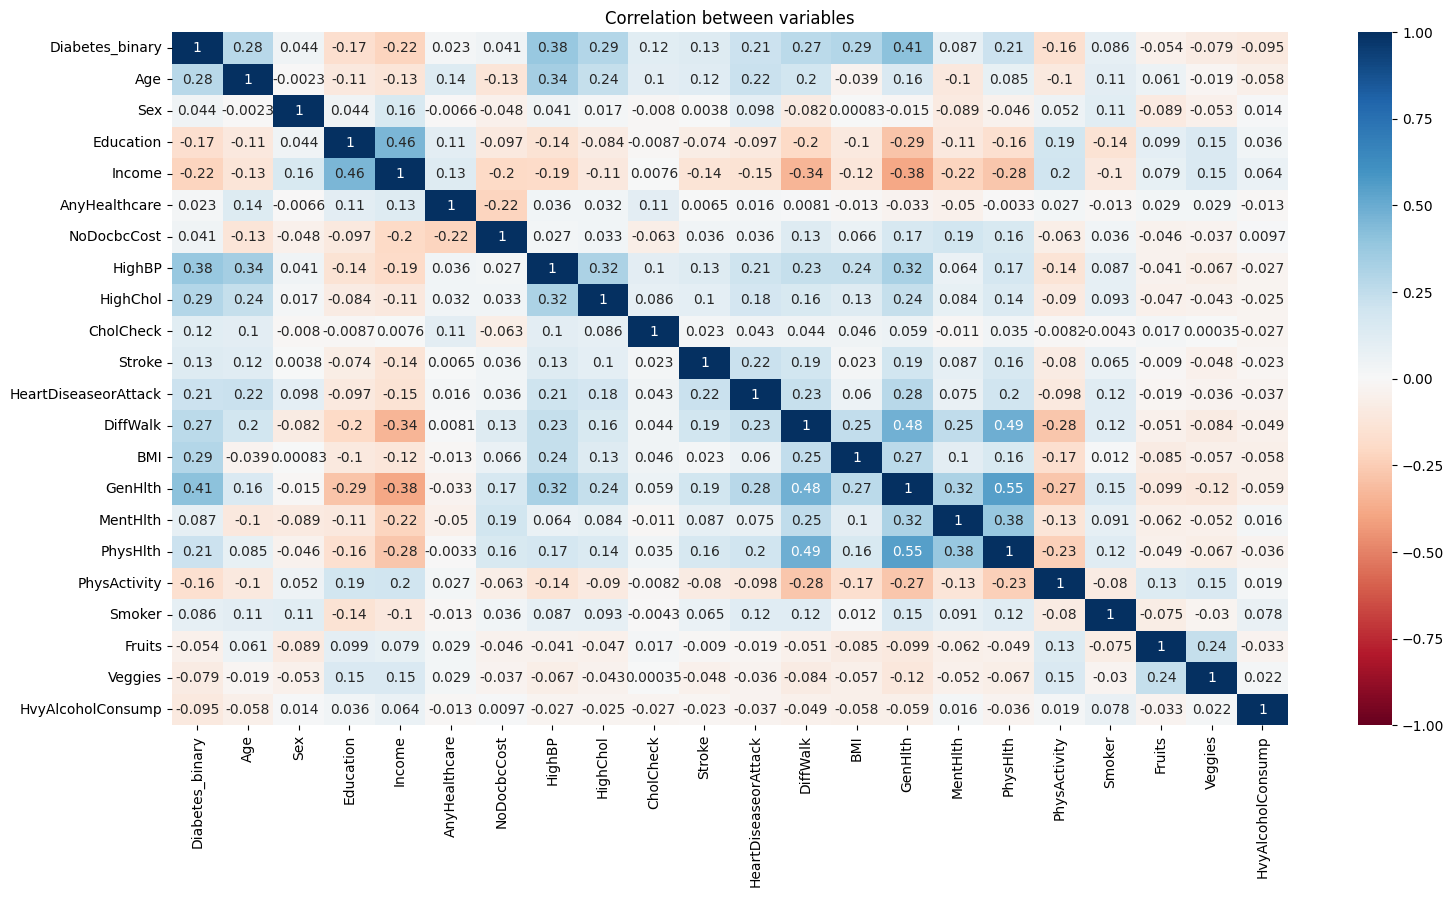

In [ ]:
cols = ['Diabetes_binary'] + cat_socialecom + cat_disease +  ['BMI'] + cat_health + cat_habit
plt.figure(figsize=(18, 9))
sns.heatmap(train[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

###Data preprocessing

In [ ]:
# split the data into X and y
X = train.drop('Diabetes_binary', axis=1)
y = train['Diabetes_binary']
# split the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = test.drop('Diabetes_binary', axis=1)
y_test = test['Diabetes_binary']

Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

###Model fitting and evaluation

In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],

                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df

 We will be training the model using the following algorithms and the best model will be saved based on performance.
*   Logistic regression
*   Decision tree
*   Random forest
*   KNN
*   Naive bayes
*   Gradient boosting

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)
results = pd.concat(results_l, axis=0).reset_index(drop=True)
results.sort_values(by='val_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
5,0.755026,0.734868,0.798495,0.765361,0.754995,0.753589,0.733281,0.794865,0.762832,0.753709,Gradient Boosting
0,0.748077,0.738670,0.768350,0.753218,0.748062,0.748497,0.737264,0.769896,0.753227,0.748559,Logistic Regression
2,0.995120,0.996633,0.993604,0.995116,0.995121,0.736120,0.716976,0.777699,0.746104,0.736240,Random Forest
4,0.719644,0.725235,0.707884,0.716455,0.719652,0.718014,0.719845,0.711165,0.715478,0.717994,Naive Bayes
3,0.797181,0.782740,0.823126,0.802425,0.797163,0.709880,0.697706,0.737693,0.717142,0.709961,KNN
1,0.995137,0.999537,0.990741,0.995119,0.995140,0.649127,0.647666,0.649596,0.648630,0.649128,Decision Tree


The Random Forest and Decision Tree models seem overfitting: the accuracy score on the training data is much higher than that on the test data.
The Gradient Boosting model has the highest accuracy score and ROC AUC score on the test data. We will use this model to predict diabetes.

###Hyperparameter tuning
We will try to improve the model by tuning the hyperparameters.

GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [4, 5, 6],
    'max_features': ['sqrt'],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [50, 100, 150],
}
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
# fit the model
grid_search.fit(X_train, y_train)
# print the best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


Evaluating the model with the best parameters

In [ ]:
best_model = GradientBoostingClassifier(**grid_search.best_params_)
evaluate_model(best_model, X_train, y_train, X_val, y_val)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc
0,0.760225,0.739354,0.804361,0.770488,0.760193,0.755358,0.734029,0.798695,0.764998,0.755483


After hyperparameter tuning, the accuracy score and ROC AUC score on the validation data are slightly improved.

###Predict the test data

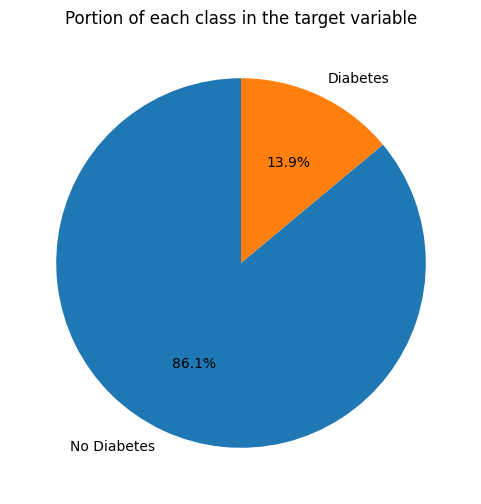

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(y_test.value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Portion of each class in the target variable')
plt.show()

              precision    recall  f1-score   support

         0.0       0.96      0.71      0.81    218334
         1.0       0.31      0.80      0.45     35346

    accuracy                           0.72    253680
   macro avg       0.63      0.76      0.63    253680
weighted avg       0.87      0.72      0.76    253680

ROC AUC score: 0.7560380405249583


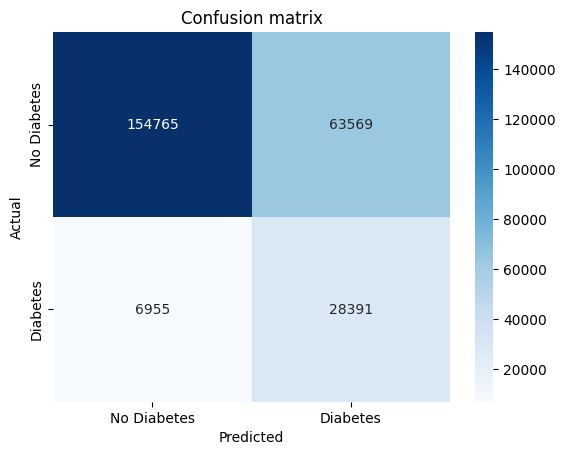

In [ ]:
# predict the test set
y_test_pred = best_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_test_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_test_pred)}')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

The model prediction looks moderate, with 0.72 accuracy score. The precision for the positive class (Diabetes) are very low. This is because the dataset is imbalanced.
The ROC AUC score is 0.76.

Plotting ROC curve

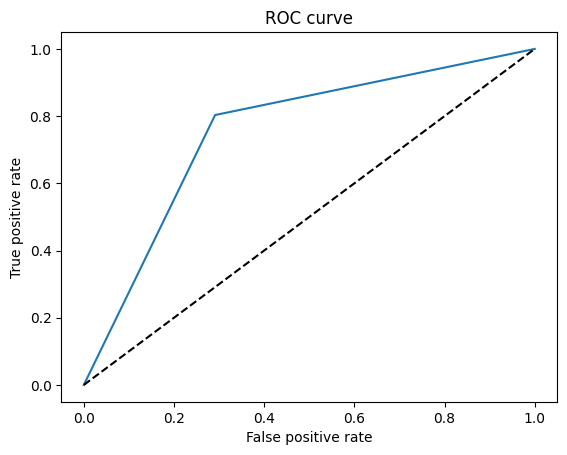

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
import pickle
pickle.dump(best_model, open('best_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))